In [77]:
import operator
import numpy as np
N = int(10e6)
array_list = range(N)
array_np = np.arange(N)

## Python

In [78]:
%%timeit

s = 0
for i in xrange(N):
    s+=i

1 loops, best of 3: 472 ms per loop


#### loop

In [79]:
%%timeit
s = 0
for i in array_list:
    s+=i

1 loops, best of 3: 339 ms per loop


In [80]:
%%timeit
s = 0
for i in array_np:
    s+=i

1 loops, best of 3: 1.13 s per loop


##### reduce

In [89]:
%%timeit
s = reduce(operator.add,array_list)

1 loops, best of 3: 358 ms per loop


In [82]:
%%timeit
s = reduce(operator.add,array_np)

1 loops, best of 3: 1.01 s per loop


#### sum

In [83]:
%%timeit
s = sum(array_list)

10 loops, best of 3: 66.6 ms per loop


In [86]:
%%timeit
s = sum(array_np)

1 loops, best of 3: 754 ms per loop


####np.sum

In [84]:
%%timeit
s = np.sum(array_list)

1 loops, best of 3: 427 ms per loop


In [85]:
%%timeit
s = np.sum(array_np)

100 loops, best of 3: 5.81 ms per loop


###convert list to np.array on the fly

In [97]:
%%timeit
s = np.sum(np.array(array_list))

1 loops, best of 3: 397 ms per loop


### plot plot plot

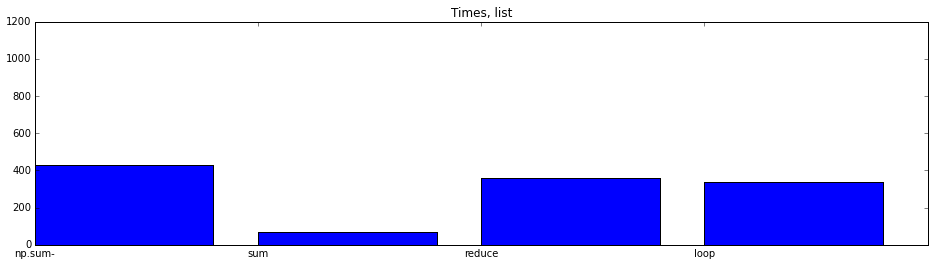

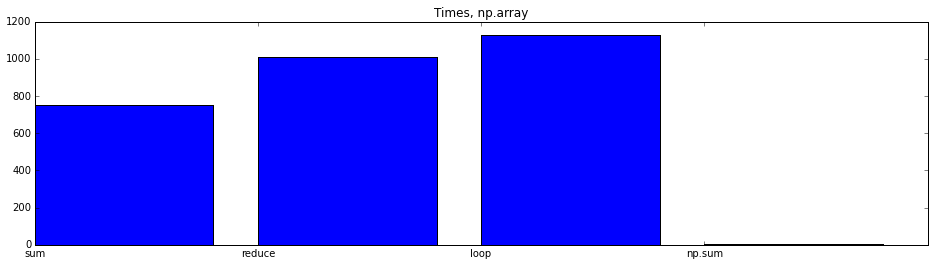

In [99]:
times_list = {
    'loop': 339,
    'sum': 67,
    'np.sum-': 427,
    'reduce': 358
}
times_np = {    
    'sum': 754,
    'loop':1130,
    'np.sum': 6,
    'reduce': 1010
    }

plt.bar(np.arange(len(times_list)),times_list.values())
plt.xticks( np.arange(len(times_list)),times_list.keys())
plt.ylim(0,1200)
plt.title('Times, list')
plt.show()

plt.bar(np.arange(len(times_np)),times_np.values())
plt.xticks( np.arange(len(times_np)),times_np.keys())
plt.ylim(0,1200)
plt.title('Times, np.array')
plt.show()

## Pypy

In [4]:
%%time
%%capture
%%pypy
N = int(10e6)
s = 0
for j in xrange(1000):
    for i in xrange(N):
        s+=i

CPU times: user 4.03 ms, sys: 4.06 ms, total: 8.09 ms
Wall time: 13 s


### hence 13ms per loop

In [5]:
%%time
%%pypy
N = int(10e6)

array = range(N)

s = 0
for j in xrange(1000):
    for i in array:
        s+=i

pypy: /home/dmitry/anaconda/lib/libssl.so.1.0.0: no version information available (required by /home/dmitry/git/pypy-2.5.1-linux64/bin/libpypy-c.so)
pypy: /home/dmitry/anaconda/lib/libssl.so.1.0.0: no version information available (required by /home/dmitry/git/pypy-2.5.1-linux64/bin/libpypy-c.so)
pypy: /home/dmitry/anaconda/lib/libcrypto.so.1.0.0: no version information available (required by /home/dmitry/git/pypy-2.5.1-linux64/bin/libpypy-c.so)


CPU times: user 4.15 ms, sys: 4.21 ms, total: 8.36 ms
Wall time: 12.5 s


### hence 12.5ms per loop

## Numba

### Python

In [100]:
from numba.decorators import autojit

def loop(array):
    s = 0
    for i in array:
        s+=i

loop_numba = autojit(loop)

In [101]:
loop_numba(array_list)

In [102]:
%%timeit
loop_numba(array)

1 loops, best of 3: 632 ms per loop


### NoPython

### loop

In [103]:
from numba.decorators import autojit

def loop():
    s = 0
    for i in xrange(N):
        s+=i

loop_numba = autojit(loop, nopython=True)

In [104]:
loop_numba()

In [105]:
%%timeit
loop_numba()

The slowest run took 27.47 times longer than the fastest. This could mean that an intermediate result is being cached 
10000000 loops, best of 3: 78.1 ns per loop


### sum array

In [106]:
from numba.decorators import autojit

def loop(array):
    s = 0
    for i in xrange(array.shape[0]):
        s+=array[i]

loop_numba = autojit(loop, nopython=True)

In [107]:
loop_numba(array_np)

In [108]:
%%timeit
loop_numba(array_np)

The slowest run took 41.09 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 191 ns per loop


## Cython

#### loop

In [109]:
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [110]:
%%cython

cimport cython 

@cython.boundscheck(False)
@cython.wraparound(False)
def loop_cython():
    cdef long s,N
    N = int(10e6)
    s = 0
    for i in xrange(N):
        s += i

In [111]:
%%timeit
loop_cython()

1 loops, best of 3: 252 ms per loop


#### sum array

In [112]:
%%cython
cimport numpy as np
cimport cython 

@cython.boundscheck(False)
@cython.wraparound(False)
def loop_cython(np.ndarray[long, ndim=1] array):
    cdef long s
    s = 0
    for i in xrange(array.shape[0]):
        s += array[i]

In [115]:
%%timeit
loop_cython(array_np)

The slowest run took 29.73 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 273 ns per loop


#Numpy

In [117]:
%%timeit
array_np.sum()

100 loops, best of 3: 5.77 ms per loop


#### Interesting

In [118]:
%%timeit
array_np.shape

The slowest run took 54.42 times longer than the fastest. This could mean that an intermediate result is being cached 
10000000 loops, best of 3: 74.5 ns per loop


In [120]:
%%timeit
len(array_list)

The slowest run took 29.37 times longer than the fastest. This could mean that an intermediate result is being cached 
10000000 loops, best of 3: 65 ns per loop


##Outline

In [121]:
import matplotlib.pyplot as plt
%matplotlib inline

In [122]:
plt.rcParams['figure.figsize'] = (16, 4)

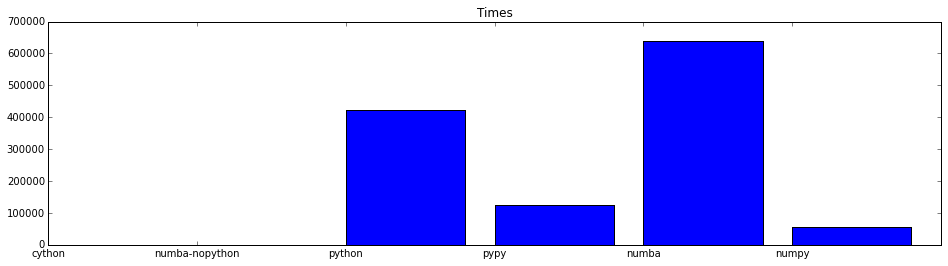

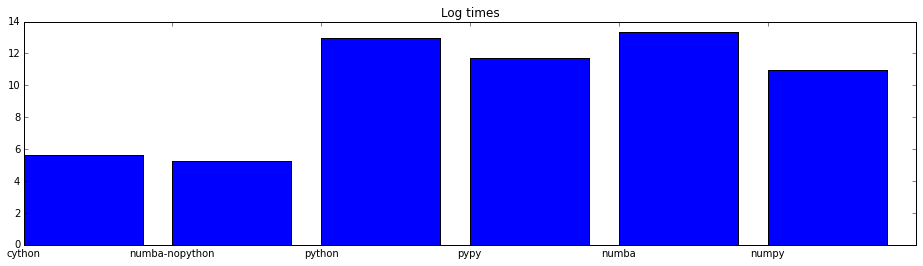

In [125]:
times = {
    'python' : 422000,
    'numba-nopython': 191,
    'numba':640000,
    'cython': 278,
    'numpy': 57000,
    'pypy': 125000,
    }

plt.bar(np.arange(len(times)),times.values())
plt.xticks( np.arange(len(times)),times.keys())
plt.title('Times')
plt.show()

plt.bar(np.arange(len(times)),np.log(times.values()))
plt.xticks( np.arange(len(times)),times.keys())
plt.title('Log times')
plt.show()